In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from pathlib import Path

# Small style adjustments for more readable plots
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

In [2]:
DATA_DIR = Path.home()/Path('shared/climate-data')

co2_file = DATA_DIR / "monthly_in_situ_co2_mlo_cleaned.csv"
data = pd.read_csv(co2_file, na_values=-99.99).dropna()
data

,year,month,date_index,fraction_date,c02,data_adjusted_season,data_fit,data_adjusted_seasonally_fit,data_filled,data_adjusted_seasonally_filed
2,1958,3,21259,1958.2027,315.70,314.43,316.19,314.90,315.70,314.43
3,1958,4,21290,1958.2877,317.45,315.16,317.30,314.98,317.45,315.16
4,1958,5,21320,1958.3699,317.51,314.71,317.86,315.06,317.51,314.71
6,1958,7,21381,1958.5370,315.86,315.19,315.86,315.22,315.86,315.19
7,1958,8,21412,1958.6219,314.93,316.19,313.99,315.29,314.93,316.19
...,...,...,...,...,...,...,...,...,...,...
756,2021,1,44211,2021.0411,415.17,415.11,415.24,415.17,415.17,415.11
757,2021,2,44242,2021.1260,416.47,415.70,416.13,415.35,416.47,415.70
758,2021,3,44270,2021.2027,417.14,415.59,417.06,415.50,417.14,415.59
759,2021,4,44301,2021.2877,418.24,415.44,418.48,415.66,418.24,415.44


In [4]:
def detrend(f):
    detrended_xarr = f - f.mean()
    f["c02"] = detrended_xarr.c02
    detrended_xarr = f
    # print(detrended_xarr)
    # BEGIN SOLUTION

    # END SOLUTION
    return detrended_xarr

dy = data.groupby('year', group_keys=True)
c02anomaly = dy.apply(detrend)
display(c02anomaly)
monthly_anomaly = c02anomaly.groupby('month').mean()[['c02']]
monthly_anomaly

year  month  date_index  fraction_date     c02  \
year                                                       
1958 2    1958      3       21259      1958.2027  0.3675   
     3    1958      4       21290      1958.2877  2.1175   
     4    1958      5       21320      1958.3699  2.1775   
     6    1958      7       21381      1958.5370  0.5275   
     7    1958      8       21412      1958.6219 -0.4025   
...        ...    ...         ...            ...     ...   
2021 756  2021      1       44211      2021.0411 -2.0180   
     757  2021      2       44242      2021.1260 -0.7180   
     758  2021      3       44270      2021.2027 -0.0480   
     759  2021      4       44301      2021.2877  1.0520   
     760  2021      5       44331      2021.3699  1.7320   

          data_adjusted_season  data_fit  data_adjusted_seasonally_fit  \
year                                                                     
1958 2                  314.43    316.19                        314.90   
     3                  315.16    317.30                        314.98   
     4                  314.71    317.86                        315.06   
     6                  315.19    315.86                        315.22   
     7                  316.19    313.99                        315.29   
...                        ...       ...                           ...   
2021 756                415.11    415.24                        415.17   
     757                415.70    416.13                        415.35   
     758                415.59    417.06                        415.50   
     759                415.44    418.48                        415.66   
     760                415.50    419.23                        415.81   

          data_filled  data_adjusted_seasonally_filed  
year                                                   
1958 2         315.70                          314.43  
     3         317.45                          315.16  
     4         317.51                          314.71  
     6         315.86                          315.19  
     7         314.93                          316.19  
...               ...                             ...  
2021 756       415.17                          415.11  
     757       416.47                          415.70  
     758       417.14                          415.59  
     759       418.24                          415.44  
     760       418.92                          415.50  

[754 rows x 10 columns]

,c02
month,
1,-0.683835
2,0.076121
3,0.874238
4,2.240270
5,2.864155
6,2.299297
7,0.792919
8,-1.195018
9,-2.851367


In [5]:
from scipy.interpolate import CubicSpline

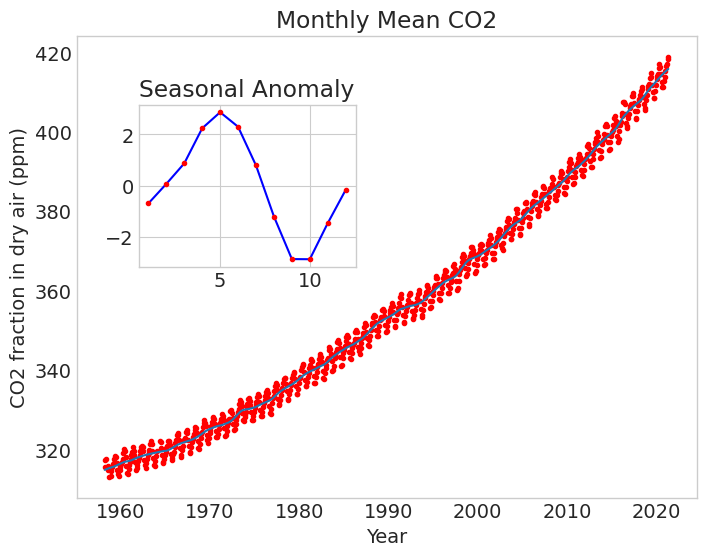

In [10]:
# plot
fig, ax = plt.subplots()

ax.plot("fraction_date", "data_filled", "r.", data=data)
ax.plot("fraction_date", "data_adjusted_seasonally_fit", data=data)
ax.set_xlabel("Year")
ax.set_ylabel("CO2 fraction in dry air (ppm)")
ax.set_title("Monthly Mean CO2")
ax.grid(False)

axin1 = ax.inset_axes([0.1, 0.5, 0.35, 0.35])
axin1.plot(monthly_anomaly.c02, "b")
axin1.plot(monthly_anomaly.c02, "r.")
axin1.set_title("Seasonal Anomaly");

# monthly_anomaly